In [59]:
# Import the required libraries and dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt

In [60]:
# Read the data from the csv into a Pandas DataFrame with the first column as row index
music_mental_health_df = pd.read_csv("Resources/mxmh_survey_results.csv")

#Drop timestamp column
music_mental_health_df = music_mental_health_df.drop(columns=["Timestamp"])

#dropping all null and NaN values
music_mental_health_df = music_mental_health_df.dropna()


# Review the DataFrame
music_mental_health_df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [61]:
# Read data types
music_mental_health_df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


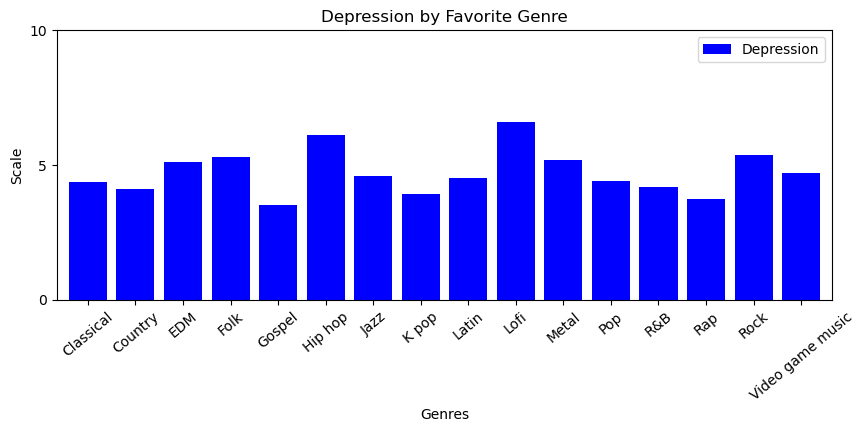

In [63]:
# Create a bar chart to chart the correlation between Depression and Fav genre
genre_depression_df = music_mental_health_df[["Fav genre", "Depression"]]

fav_genre = genre_depression_df.groupby("Fav genre").mean()

fav_genre_chart = fav_genre.plot.bar(y='Depression', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Depression by Favorite Genre',
                                    yticks=[0,5,10], xlabel='Genres', ylabel='Scale', color='blue')

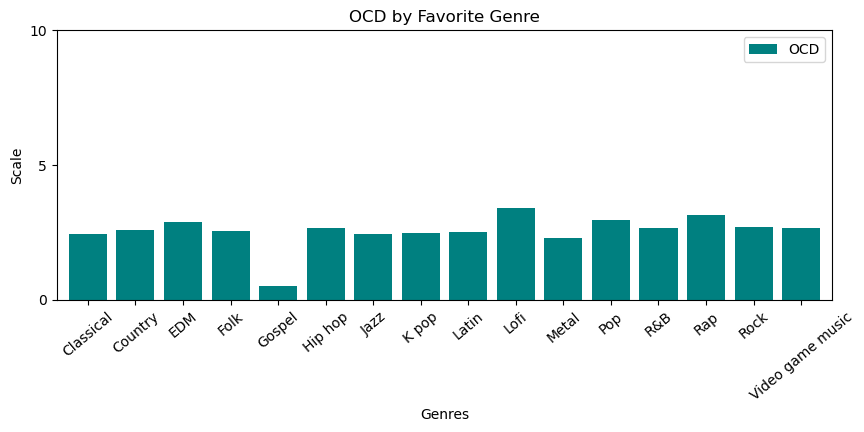

In [66]:
# Create a bar chart to chart the correlations between OCD and Fav genre
genre_ocd_df = music_mental_health_df[["Fav genre", "OCD"]]

fav_genre = genre_ocd_df.groupby("Fav genre").mean()

fav_genre_chart = fav_genre.plot.bar(y='OCD', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='OCD by Favorite Genre',
                                    yticks=[0,5,10], xlabel='Genres', ylabel='Scale', color='teal')

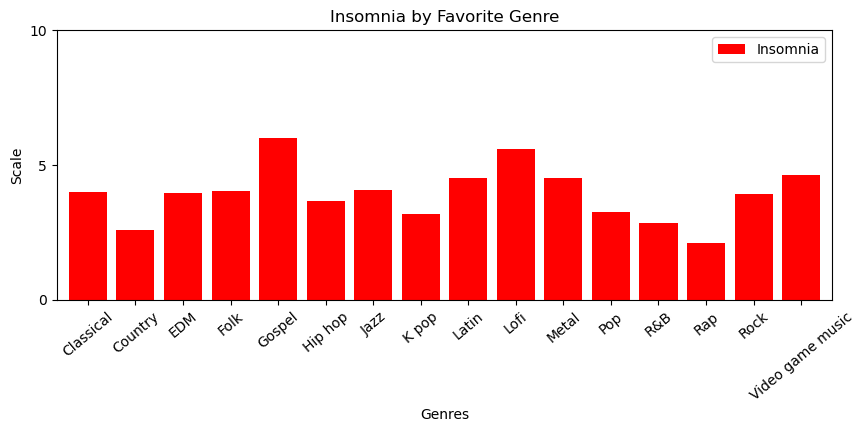

In [65]:
# Create a bar chart to chart the correlation between Insomnia and Fav genre
genre_insomnia_df = music_mental_health_df[["Fav genre", "Insomnia"]]
fav_genre = genre_insomnia_df.groupby("Fav genre").mean()
fav_genre_chart = fav_genre.plot.bar(y='Insomnia', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Insomnia by Favorite Genre',
                                    yticks=[0,5,10], xlabel='Genres', ylabel='Scale', color='red')

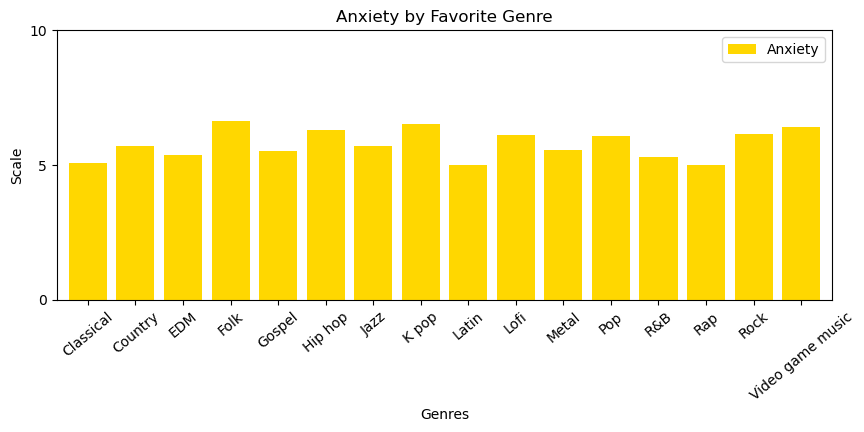

In [64]:
# Create a bar chart to chart the correlation between Anxiety and Fav genre
genre_anxiety_df = music_mental_health_df[["Fav genre", "Anxiety"]]
fav_genre = genre_anxiety_df.groupby("Fav genre").mean()
fav_genre_chart = fav_genre.plot.bar(y='Anxiety', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Anxiety by Favorite Genre',
                                    yticks=[0,5,10], xlabel='Genres', ylabel='Scale', color='gold')

In [ ]:
# Show the data correlation for the Lofi DataFrame with Depression, BPM, OCD, Anxiety, Insomnia, Age and Hours per day
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]]
df_lofi = df[df["Fav genre"]=='Lofi']
df_lofi[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.128445,-0.135977,0.317385,0.004526,0.605983,-0.396628
BPM,0.128445,1.000000,0.838936,0.498297,0.530213,0.111947,0.342493
OCD,-0.135977,0.838936,1.000000,0.583753,0.273805,-0.068341,0.197853
Anxiety,0.317385,0.498297,0.583753,1.000000,0.141651,0.439378,-0.132489
Insomnia,0.004526,0.530213,0.273805,0.141651,1.000000,-0.102015,0.414496
Age,0.605983,0.111947,-0.068341,0.439378,-0.102015,1.000000,-0.475404
Hours per day,-0.396628,0.342493,0.197853,-0.132489,0.414496,-0.475404,1.000000


In [ ]:
# Show the data correlation for the Rock DataFrame with Depression, BPM, OCD, Anxiety, Insomnia, Age and Hours per day
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]]
df_rock = df[df["Fav genre"]=='Rock']
df_rock[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.078411,0.157144,0.589361,0.172273,-0.252970,-0.000346
BPM,0.078411,1.000000,-0.065952,-0.012530,0.067676,0.082998,0.031289
OCD,0.157144,-0.065952,1.000000,0.288805,0.109940,-0.121107,0.104889
Anxiety,0.589361,-0.012530,0.288805,1.000000,0.180522,-0.364729,0.036752
Insomnia,0.172273,0.067676,0.109940,0.180522,1.000000,-0.076783,0.127961
Age,-0.252970,0.082998,-0.121107,-0.364729,-0.076783,1.000000,-0.095655
Hours per day,-0.000346,0.031289,0.104889,0.036752,0.127961,-0.095655,1.000000


In [ ]:
# Show the data correlation for the Hip hop DataFrame with Depression, BPM, OCD, Anxiety, Insomnia, Age and Hours per day
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]]
df_hiphop = df[df["Fav genre"]=='Hip hop']
df_hiphop[["Depression","BPM","OCD", "Anxiety", "Insomnia", "Age", "Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,-0.213068,-0.101752,0.370190,0.213998,-0.145123,0.383677
BPM,-0.213068,1.000000,0.103311,-0.245486,0.132909,0.156195,0.171723
OCD,-0.101752,0.103311,1.000000,0.103909,-0.025674,0.058400,-0.164018
Anxiety,0.370190,-0.245486,0.103909,1.000000,-0.082725,-0.220458,-0.022629
Insomnia,0.213998,0.132909,-0.025674,-0.082725,1.000000,0.260482,0.445824
Age,-0.145123,0.156195,0.058400,-0.220458,0.260482,1.000000,-0.233077
Hours per day,0.383677,0.171723,-0.164018,-0.022629,0.445824,-0.233077,1.000000


In [ ]:
# Get information on the sample data
# to show the average age of the population
average_age = music_mental_health_df['Age'].mean()
print(average_age)

# Show the average age for Anxiety
average_anxiety = music_mental_health_df['Anxiety'].mean()
print(average_anxiety)

# Show the average age for Depression
average_depression = music_mental_health_df['Depression'].mean()
print(average_depression)

# Show the average age for Insomnia
average_insomnia = music_mental_health_df['Insomnia'].mean()
print(average_insomnia)

# Show the average age for OCD
average_ocd = music_mental_health_df['OCD'].mean()
print(average_ocd)

24.792207792207794
5.883928571428571
4.89448051948052
3.8011363636363638
2.659090909090909


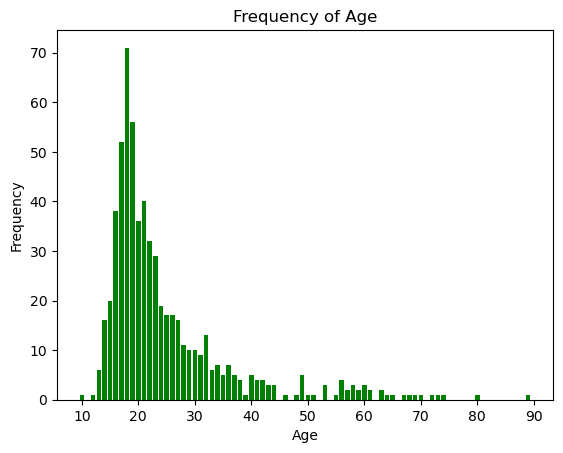

In [ ]:
# View graphs on the distribution of the sample data
# Age
age_dist = music_mental_health_df['Age']
freq_counts = age_dist.value_counts()
plt.bar(freq_counts.index, freq_counts.values, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age')
plt.show()

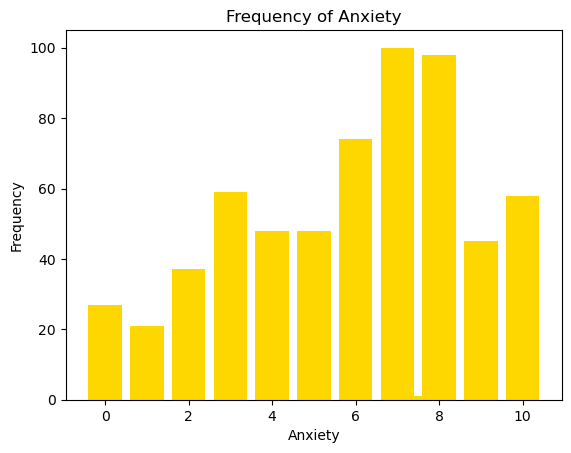

In [ ]:
# View graphs on the distribution of the sample data
# Anxiety
anxiety_dist = music_mental_health_df['Anxiety']
freq_anx_counts = anxiety_dist.value_counts()
plt.bar(freq_anx_counts.index, freq_anx_counts.values, color ="gold")
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.title('Frequency of Anxiety')
plt.show()

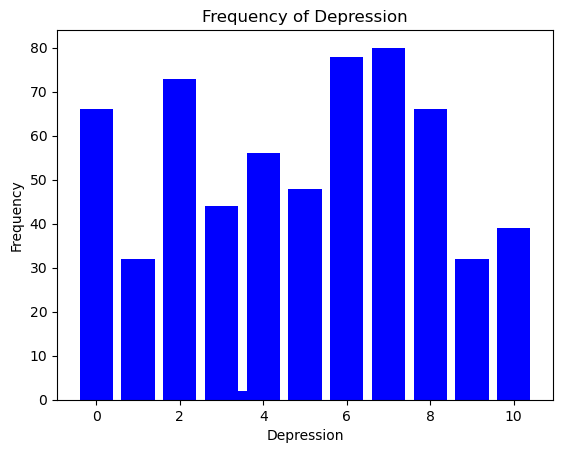

In [ ]:
# View graphs on the distribution of the sample data
# Depression
depression_dist = music_mental_health_df['Depression']
freq_dep_counts = depression_dist.value_counts()
plt.bar(freq_dep_counts.index, freq_dep_counts.values, color='blue')
plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.title('Frequency of Depression')
plt.show()

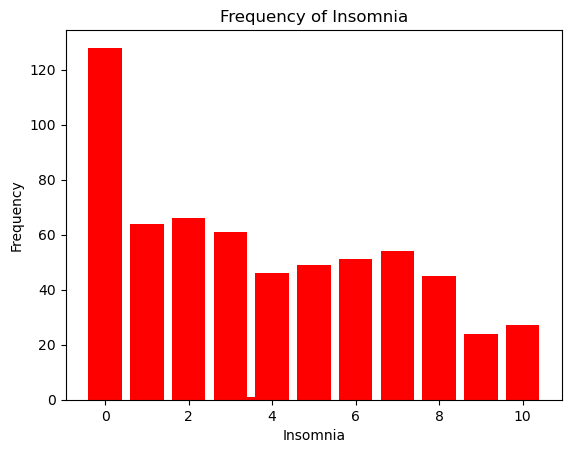

In [ ]:
# View graphs on the distribution of the sample data
# Insomnia
insomnia_dist = music_mental_health_df['Insomnia']
freq_ins_counts = insomnia_dist.value_counts()
plt.bar(freq_ins_counts.index, freq_ins_counts.values, color="red")
plt.xlabel('Insomnia')
plt.ylabel('Frequency')
plt.title('Frequency of Insomnia')
plt.show()

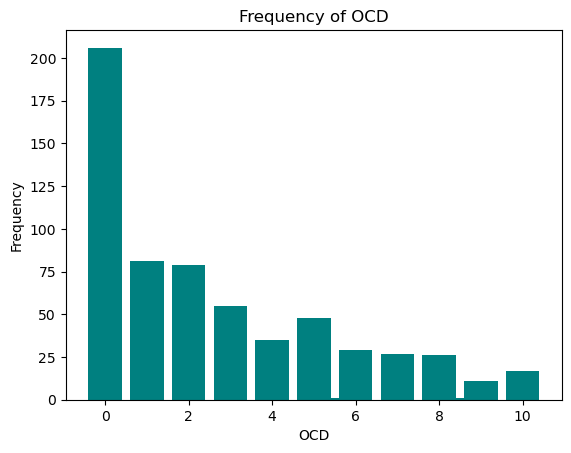

In [ ]:
# View graphs on the distribution of the sample data
# OCD
ocd_dist = music_mental_health_df['OCD']
freq_ocd_counts = ocd_dist.value_counts()
plt.bar(freq_ocd_counts.index, freq_ocd_counts.values, color="teal")
plt.xlabel('OCD')
plt.ylabel('Frequency')
plt.title('Frequency of OCD')
plt.show()

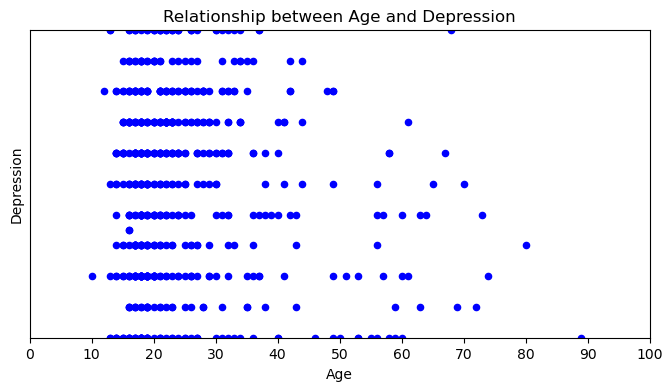

In [ ]:
# Create a scatter plot to chart the correlation between Depression and age
age_depression = music_mental_health_df.plot.scatter(x="Age",y="Depression",title="Relationship between Age and Depression", figsize=(8,4),
                                        xlabel="Age",ylabel="Depression",color="blue",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

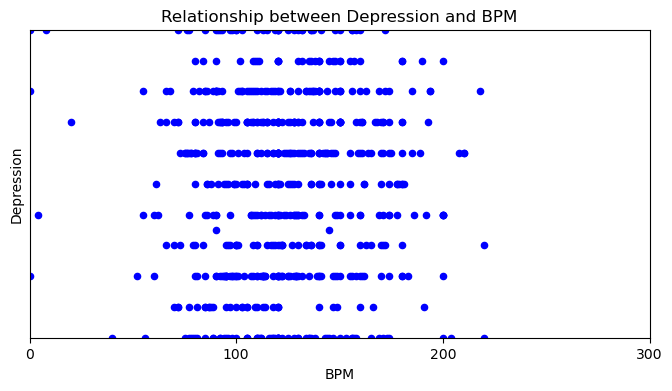

In [ ]:
# Create a scatter plot to chart the correlation between Depression and BPM
bpm_depression = music_mental_health_df.plot.scatter(x="BPM",y="Depression",title="Relationship between Depression and BPM", figsize=(8,4),
                                        xlabel="BPM",ylabel="Depression",color="blue",
                                        xlim=(0,300),ylim=(0,10),xticks=(0, 100, 200, 300),yticks=())

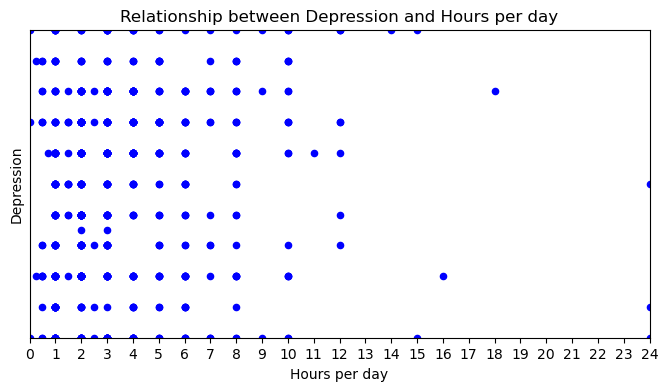

In [ ]:
# Create a scatter plot to chart the correlation between Depression and Hours per day
hours_per_day_depression = music_mental_health_df.plot.scatter(x="Hours per day",y="Depression",title="Relationship between Depression and Hours per day", figsize=(8,4),
                                        xlabel="Hours per day",ylabel="Depression",color="blue",
                                        xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())

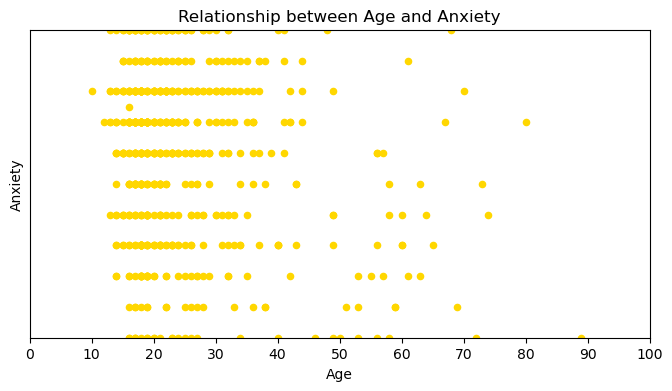

In [ ]:
# Create a scatter plot to chart the correlation between Anxiety and age 
age_anxiety = music_mental_health_df.plot.scatter(x="Age",y="Anxiety",title="Relationship between Age and Anxiety", figsize=(8,4),
                                        xlabel="Age",ylabel="Anxiety",color="gold",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

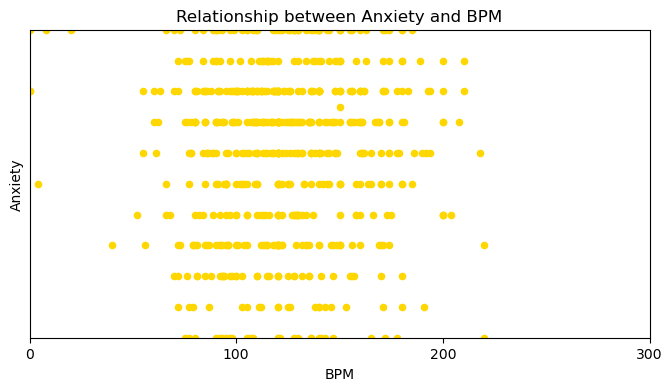

In [ ]:
# Create a scatter plot to chart the correlation between Anxiety and BPM
bpm_anxiety = music_mental_health_df.plot.scatter(x="BPM",y="Anxiety",title="Relationship between Anxiety and BPM", figsize=(8,4),
                                        xlabel="BPM",ylabel="Anxiety",color="gold",
                                        xlim=(0,300),ylim=(0,10),xticks=(0, 100, 200, 300),yticks=())

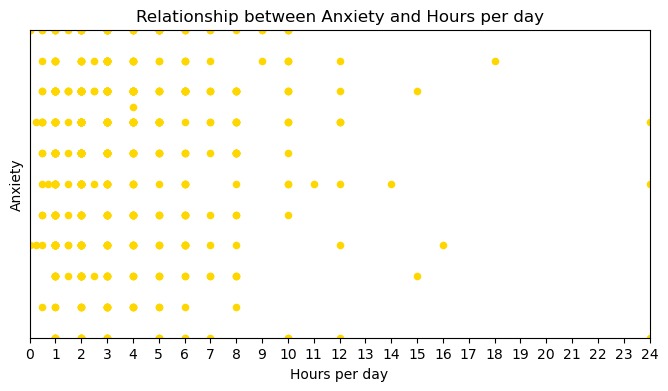

In [ ]:
# Create a scatter plot to chart the correlation between Anxiety and Hours per day
hours_per_day_anxiety = music_mental_health_df.plot.scatter(x="Hours per day",y="Anxiety",title="Relationship between Anxiety and Hours per day", figsize=(8,4),
                                        xlabel="Hours per day",ylabel="Anxiety",color="gold",
                                        xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())

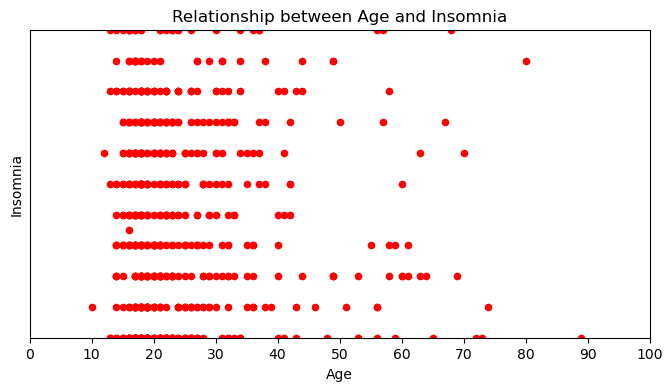

In [ ]:
# Create a scatter plot to chart the correlation between Insomnia and age
age_insomnia = music_mental_health_df.plot.scatter(x="Age",y="Insomnia",title="Relationship between Age and Insomnia", figsize=(8,4),
                                        xlabel="Age",ylabel="Insomnia",color="red",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

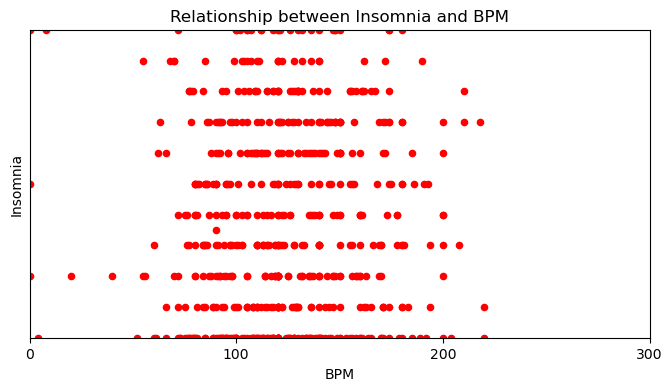

In [ ]:
# Create a scatter plot to chart the correlation between Insomnia and BPM
bpm_insomnia = music_mental_health_df.plot.scatter(x="BPM",y="Insomnia",title="Relationship between Insomnia and BPM", figsize=(8,4),
                                        xlabel="BPM",ylabel="Insomnia",color="red",
                                        xlim=(0,300),ylim=(0,10),xticks=(0, 100, 200, 300),yticks=())

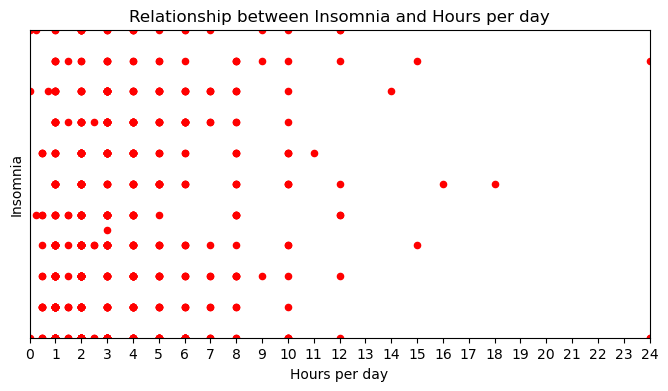

In [ ]:
# Create a scatter plot to chart the correlation between Insomnia and Hours per day
hours_per_day_anxiety = music_mental_health_df.plot.scatter(x="Hours per day",y="Insomnia",title="Relationship between Insomnia and Hours per day", figsize=(8,4),
                                        xlabel="Hours per day",ylabel="Insomnia",color="red",
                                        xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())

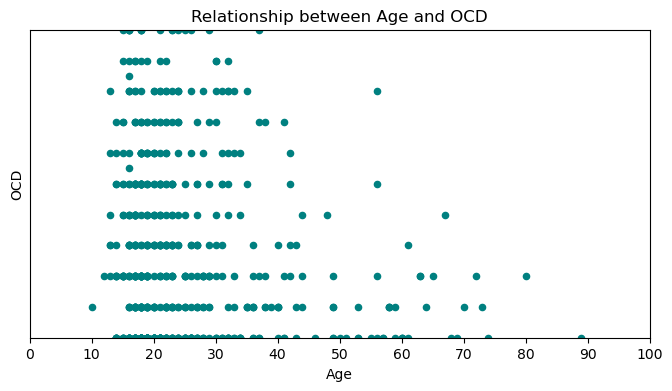

In [ ]:
# Create a scatter plot to chart the correlation between OCD and age
age_ocd = music_mental_health_df.plot.scatter(x="Age",y="OCD",title="Relationship between Age and OCD", figsize=(8,4),
                                        xlabel="Age",ylabel="OCD",color="teal",
                                        xlim=(0,100),ylim=(0,10),xticks=(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),yticks=())

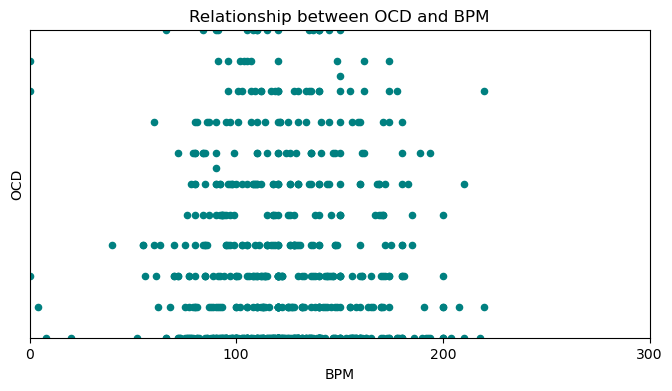

In [ ]:
# Create a scatter plot to chart the correlation between OCD and BPM
bpm_ocd = music_mental_health_df.plot.scatter(x="BPM",y="OCD",title="Relationship between OCD and BPM", figsize=(8,4),
                                        xlabel="BPM",ylabel="OCD",color="teal",
                                        xlim=(0,300),ylim=(0,10),xticks=(0, 100, 200, 300),yticks=())

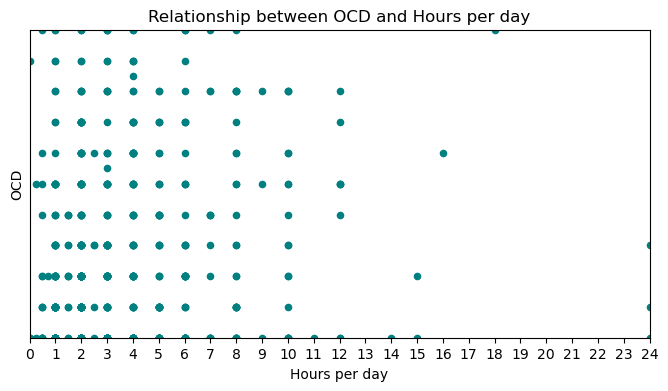

In [ ]:
# Create a scatter plot to chart the correlation between OCD and Hours per day
bpm_ocd = music_mental_health_df.plot.scatter(x="Hours per day",y="OCD",title="Relationship between OCD and Hours per day", figsize=(8,4),
                                        xlabel="Hours per day",ylabel="OCD",color="teal",
                                        xlim=(0,24),ylim=(0,10),xticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24),yticks=())

In [ ]:
# Show the data correlation for the sample with Depression, BPM, OCD, Anxiety, Insomnia, Age and Hours per day
music_mental_health_df[["Depression","BPM", "OCD", "Anxiety", "Insomnia", "Age","Hours per day"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia,Age,Hours per day
Depression,1.000000,0.041804,0.158990,0.527950,0.372675,-0.087390,0.085559
BPM,0.041804,1.000000,0.018939,-0.027564,0.054452,-0.030435,0.043320
OCD,0.158990,0.018939,1.000000,0.339262,0.198866,-0.140464,0.108197
Anxiety,0.527950,-0.027564,0.339262,1.000000,0.275013,-0.193781,0.036945
Insomnia,0.372675,0.054452,0.198866,0.275013,1.000000,0.007083,0.119036
Age,-0.087390,-0.030435,-0.140464,-0.193781,0.007083,1.000000,-0.044917
Hours per day,0.085559,0.043320,0.108197,0.036945,0.119036,-0.044917,1.000000
